In [7]:
import numpy as np 
import pandas as pd 


In [8]:
# Series --> 1D as if we want to fetch data we need to give 1 info.
# DataFrame --> 2D as if we want to fetch data we need to give 2 info.

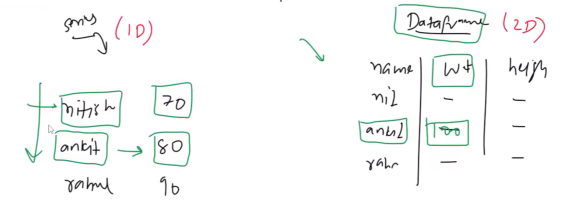

In [9]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [10]:
# The problem?
a['cse']

KeyError: 'cse'

In [ ]:
## The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [ ]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]
multiindex.levels[0]

# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]],names=['branch','year'])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           names=['branch', 'year'])

In [ ]:
# Level inside multiindex object --> 
multiindex.levels[0]
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [ ]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# how to fetch items from such a series
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [ ]:
# unstack
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [ ]:
# stack
temp.stack()


cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# Then what was the point of multiindex series?
# we represent higher dimensional data in a lower dimensional form
# we can do all the operations which we do in dataframe
# we can easily convert back and forth between series and dataframe


In [ ]:
# multiindex DataFrame


In [13]:
multiindex = pd.MultiIndex.from_tuples(index_val)

branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16]
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [14]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [15]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [18]:
# Are columns really different from index?
# Let's check the values
branch_df1.index, branch_df1.columns
# 


(MultiIndex([('cse', 2019),
             ('cse', 2020),
             ('cse', 2021),
             ('cse', 2022),
             ('ece', 2019),
             ('ece', 2020),
             ('ece', 2021),
             ('ece', 2022)],
            ),
 Index(['avg_package', 'students'], dtype='object'))

In [19]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [5,10,6,12],
        [7,14,8,16],
        [9,18,10,20],
        [11,22,12,24],
    ],
    index=[2020,2021,2022,2023],
    columns=pd.MultiIndex.from_product([['Kolkata','Delhi'],['avg_package','students']])

)

branch_df2

Kolkata                Delhi         
     avg_package students avg_package students
2020           5       10           6       12
2021           7       14           8       16
2022           9       18          10       20
2023          11       22          12       24

In [21]:
branch_df2.loc[2023] # loc is used to access a group of rows and columns by labels or a boolean array


Kolkata  avg_package    11
         students       22
Delhi    avg_package    12
         students       24
Name: 2023, dtype: int64

In [24]:
# Multiindex df in terms of both cols and index
index1 = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index1)
branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and unstacking

In [26]:
branch_df3.stack().stack()

C:\Users\souvi\AppData\Local\Temp\ipykernel_4216\4023844418.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### Working with multiindex dataframes

In [27]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [30]:
# Extracting rows single
branch_df3.loc[('cse', 2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [32]:
# multiple
branch_df3.loc[('cse',2020):('cse',2022):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2020           3        4           0        0
    2022           7        8           0        0

In [33]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [34]:
# Extracting Columns
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [37]:
# iloc slicing explanation:
# iloc[row_selection, column_selection] - uses integer positions (0-based indexing)
# branch_df3.iloc[:,1:3] means:
# : (colon) = select ALL rows (no row filtering)
# 1:3 = select columns from index 1 to 2 (3 is excluded, like range in Python)
# 
# Let's see what columns we have:
# Column 0: ('delhi', 'avg_package')
# Column 1: ('delhi', 'students')     <- This will be selected
# Column 2: ('mumbai', 'avg_package') <- This will be selected  
# Column 3: ('mumbai', 'students')
# 
# So iloc[:,1:3] selects columns 1 and 2, which are:
# ('delhi', 'students') and ('mumbai', 'avg_package')

branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [38]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [39]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=0,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [40]:
# multiindex dataframe(col) -> transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [41]:
# swaplevel
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
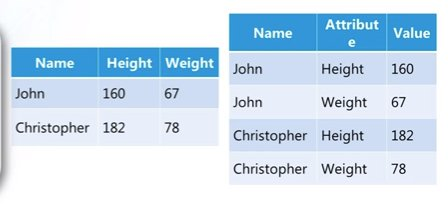

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [42]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]})

,cse
0,120


In [43]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [44]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [47]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [48]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [50]:
# melt --> real world example
death = pd.read_csv(r'D:\AI\Pandas\9\time_series_covid19_deaths_global.csv')

confirm = pd.read_csv(r'D:\AI\Pandas\9\time_series_covid19_confirmed_global.csv')

In [51]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [52]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [53]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [54]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [55]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024
